<a href="https://colab.research.google.com/github/ArjunNair2004/Breast-Cancer-Detection-Model-/blob/main/DL_Activity2(BCD).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Breast Cancer Detection**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Model Evaluation on Test Data
Test Accuracy : 96.49%
Test Loss     : 0.1024

Confusion Matrix:
[[41,  2],
 [ 2, 69]]

Interpretation of Confusion Matrix:
True Negatives (0 correctly classified): 41
False Positives (0 incorrectly classified as 1): 2
False Negatives (1 incorrectly classified as 0): 2
True Positives (1 correctly classified): 69


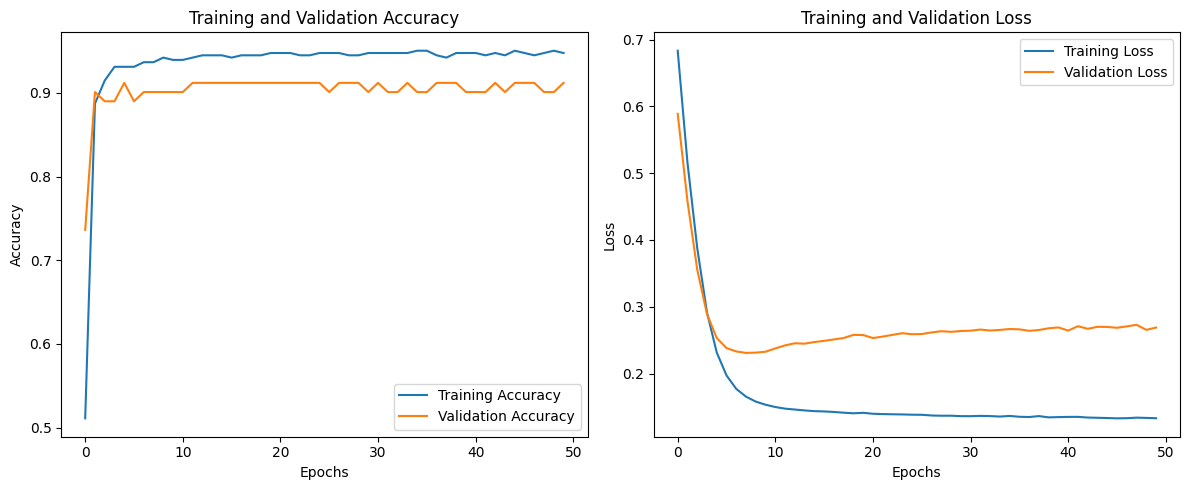

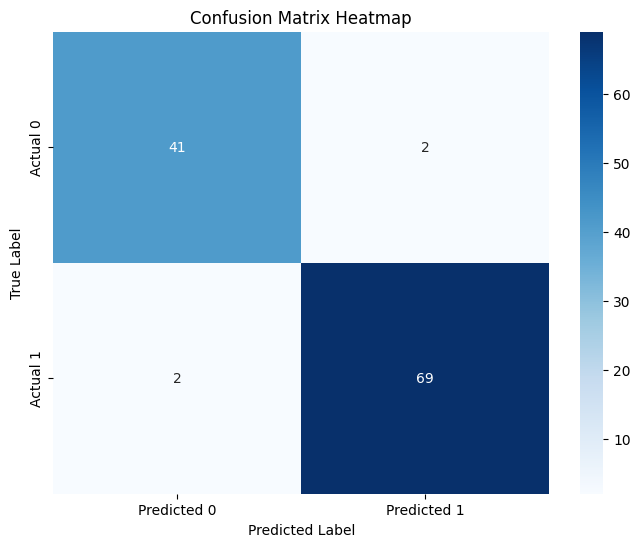

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_excel('/content/Breast_cancer_data.xlsx')

# Split the data into features and labels
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the ANN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=0)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred)

# Displaying the results in a clear format
print("="*40)
print(f"Model Evaluation on Test Data")
print("="*40)
print(f"Test Accuracy : {test_accuracy*100:.2f}%")
print(f"Test Loss     : {test_loss:.4f}")

print("\nConfusion Matrix:")
print(np.array2string(confusion_mtx, separator=', '))

# Adding a clearer explanation of the confusion matrix
print("\nInterpretation of Confusion Matrix:")
print(f"True Negatives (0 correctly classified): {confusion_mtx[0, 0]}")
print(f"False Positives (0 incorrectly classified as 1): {confusion_mtx[0, 1]}")
print(f"False Negatives (1 incorrectly classified as 0): {confusion_mtx[1, 0]}")
print(f"True Positives (1 correctly classified): {confusion_mtx[1, 1]}")

# Plotting the Accuracy and Loss Graphs over Epochs
history_dict = history.history

# Plot Accuracy over epochs
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss over epochs
plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Plotting the Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix Heatmap')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
